
## Data Science Project： Studied Customer behavior by Decision Tree

### by Xiaohui(Eartha) Guo


***

### Preparing a Training Set and Training a Decision Tree



This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but DO NOT use the data splitting functions from Sklearn.

In [113]:
import pandas as pd

# Code here
# read the original data set and add column names
names=col_headers_list = ['revenue','outcalls','incalls','months','eqpdays','webcap','marryyes','travel','pcown','creditcd','retcalls','churndep']
df = pd.read_csv('/Users/earthaguo/earthaguo/Documents/Introduction to data science/Hw2 March 28/ipython/hw/hw_2/data/cell2cell_data.csv',header=None, names=col_headers_list)
df.shape


(39859, 12)

In [114]:
# split the data into training and testing
train_df=df.sample(frac=0.8,random_state=39859)
test_df=df.drop(train_df.index)


In [316]:
train_df.head()


,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
13260,56.07,11.67,2.67,9,288,1,0,0,1,1,0,1
12320,69.63,15.00,1.67,26,467,1,0,1,0,1,0,1
10363,66.47,3.33,0.67,13,381,1,1,0,0,1,0,1
18012,50.53,3.00,1.33,30,270,1,1,0,0,1,0,1
1416,50.74,13.00,0.00,30,900,0,0,0,0,1,0,1


In [317]:
test_df.head()

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
2,29.99,0.00,0.00,52,1441,0,0,0,1,1,3,1
13,98.47,24.67,3.33,35,13,0,0,1,1,1,3,1
15,25.14,15.00,1.00,25,743,1,0,0,0,0,2,1
31,16.14,0.00,0.00,44,1324,0,0,0,0,1,1,1
37,37.49,18.00,33.67,32,718,1,1,0,0,1,2,1


In [318]:
#Check the shape of training data and testing data
train_df.shape

(31887, 12)

In [319]:
test_df.shape

(7972, 12)

In [320]:
# Double check the sum of the rows of train and test data
7972 + 31887

39859

In [80]:
#it sums up to be the total row number of the origianl data set. 

2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

#### Answer:

When sampling is random, the sample mean methods can be used to measure the extent of the variation caused by sampling error. If we know the population mean,  use the bootstrap to generate a confidence interval of the sample mean. we calculate the mean of the sample we generated. If the sample mean we calculated is within the confidence interval, then can can say we are some percent confidence that the sample is random. 









3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

In [102]:
import sklearn
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
%matplotlib inline


# Code here
clf = DecisionTreeClassifier(criterion='entropy')
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

4\. Using the resulting model from 2.2, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

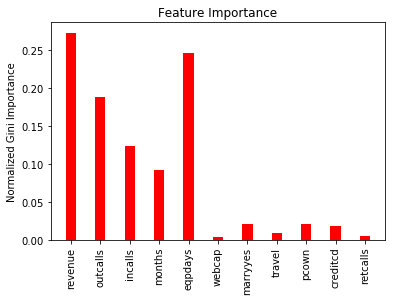

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline

# Code here

lab = 'churndep'
clf = DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(train_df.drop(lab, 1), train_df[lab])


fig, ax = plt.subplots()
width = 0.35
#ax.bar(train.drop(lab,1).columns.values, clf.feature_importances_, width, color='r')
ax.bar(np.arange(11), clf.feature_importances_, width, color = 'r')
ax.set_xticks(np.arange(len(clf.feature_importances_)))
ax.set_xticklabels(train_df.drop(lab,1).columns.values, rotation = 90)
plt.title('Feature Importance')
ax.set_ylabel('Normalized Gini Importance')

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

In [83]:
# Code/answer 
Correlation = df.corr()
Correlation


,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
revenue,1.000000,0.500870,0.391010,-0.015780,-0.221958,0.106620,-0.096705,-0.041864,-0.081805,-0.087456,0.015427,-0.013566
outcalls,0.500870,1.000000,0.732988,-0.040653,-0.243999,0.112359,-0.125843,-0.039030,-0.091914,-0.098286,0.012671,-0.037233
incalls,0.391010,0.732988,1.000000,-0.026167,-0.204684,0.092961,-0.094644,-0.037147,-0.076525,-0.078713,0.004195,-0.042031
months,-0.015780,-0.040653,-0.026167,1.000000,0.484487,-0.251660,0.083572,0.043673,0.061681,0.139435,0.067772,0.022041
eqpdays,-0.221958,-0.243999,-0.204684,0.484487,1.000000,-0.394750,0.113467,0.045884,0.071068,0.123862,-0.025709,0.112731
webcap,0.106620,0.112359,0.092961,-0.251660,-0.394750,1.000000,-0.059369,-0.006382,-0.029652,-0.064909,-0.008354,-0.067481
marryyes,-0.096705,-0.125843,-0.094644,0.083572,0.113467,-0.059369,1.000000,0.150330,0.331503,0.435091,-0.021632,-0.007981
travel,-0.041864,-0.039030,-0.037147,0.043673,0.045884,-0.006382,0.150330,1.000000,0.254606,0.161626,-0.009184,-0.005919
pcown,-0.081805,-0.091914,-0.076525,0.061681,0.071068,-0.029652,0.331503,0.254606,1.000000,0.292806,-0.018081,-0.004160
creditcd,-0.087456,-0.098286,-0.078713,0.139435,0.123862,-0.064909,0.435091,0.161626,0.292806,1.000000,-0.009132,-0.014498


#### Answer: The top 3 most importnat features are "revenue", "eqpdays" and "outcalls". 

The correlation between "revenue" and "eqpdays" is -0.221958.

So revenue and eqpdays are negatively correlated. 

The correlation between "revenue" and "outcalls" is 0.500870.

So revenue and outcalls are positively correlated.

The correlation between "eqpdays" and "outcalls" is -0.243999.

So eqpdays and outcalls are negatively correlated.

The correlation between "revenue" and "churndep" is -0.013566.

So revenue and churndep is negatively correlated. 

The correlation between "eqpdays" and "churndep" is 0.112731.

So eqpdays and churndep is positively correlated.

The correlation between "outcalls" and "churndep" is -0.037233.

So outcalls and churndep is negatively correlated.

The real-life connections are: the higher the monthly revenue the customer has, the less possible that the customer churned; the larger the number of days the customer has had his/her current equipment, the more possible that the customer churned; the larger the number of outbound voice calls is, the less possible that the customer churned. 



6\. Using the classifier built in 2.2, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each?

In [106]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, roc_auc_score
import sys

#These all need to be installed to both run and visualize a tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
%matplotlib inline

In [107]:
cm = confusion_matrix(clf.predict(train_df.drop(lab, 1)), train_df['churndep'])
cm 
# accuracy = (cm[0][0] + cm[1][1]) / float(sum(cm))

array([[15973,     6],
       [    0, 15908]])

In [86]:
ans1 = (cm[0][0] + cm[1][1]) /(cm[0][0] + cm[1][1] +cm[0][1]+cm[1][0] )
ans1


0.99981183554426567

#### So the prediciton accuray on train_df is around 0.99981.

In [111]:
cm2 = confusion_matrix(clf.predict(test_df.drop(lab, 1)), test_df['churndep'])
cm2 

array([[2143, 1874],
       [1842, 2113]])

In [112]:
ans2 = (cm2[0][0] + cm2[1][1]) /(cm2[0][0] + cm2[1][1] +cm2[0][1]+cm2[1][0] )
ans2

0.53386853988961369

#### So the prediciton accuray on test_df is around 0.531736

=====================================================================================================================




### Part 2 - Finding a Good Decision Tree
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters mim_samples_split and min_samples_leaf. 

In [273]:
# Code here


#Create a function to calculate prediciton accuracy on test data with min_samples_split_values and min_samples_leaf_values as input
def accuracy_test(min_samples_split_values,min_samples_leaf_values):
    import pandas as pd
    import numpy as np
    import scipy as sp
    import matplotlib.pyplot as plt

    from sklearn.metrics import confusion_matrix, roc_auc_score
    import sys

    #These all need to be installed to both run and visualize a tree
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.tree import export_graphviz
    from IPython.display import Image
    %matplotlib inline
    
    clf = DecisionTreeClassifier(criterion='entropy', min_samples_split = min_samples_split_values, min_samples_leaf = min_samples_leaf_values )
    lab = 'churndep'
    clf = clf.fit(train_df.drop(lab, 1), train_df[lab])
    cm = confusion_matrix(clf.predict(test_df.drop(lab, 1)), test_df['churndep'])
    acc = (cm[0][0] + cm[1][1]) /(cm[0][0] + cm[1][1] +cm[0][1]+cm[1][0] )
    
    return acc



In [274]:
# Test whether the function is correct. Compare with the value calculated before. 
accuracy_test(2,1)

0.53211239337681882

In [306]:
# test multiple times using different pairs of parameters values
accuracy_test(300,2200)

0.59019066733567482

### The lists I generated are:

In [307]:
min_samples_split_values = [2,1000,2000,3000,4000,5000,6000,7000,8000,10000]
min_samples_leaf_values = [1,20,50,80,150,200,300,500,800,1000]

2\. Explain in words your reasoning for choosing the above ranges.

#### Answer:

First of all I created a function "accuracy_test(min_samples_split_values,min_samples_leaf_values)" to calcualte the prediction accuracy with the min_samples_split_values and min_samples_leaf_values as input.

Then I used the function to test.

Since the goal is to analyze whether tuning the parameters can improve the accuracy of the classifier. So we have better enlarge the range of the min_samples_split_values and min_samples_leaf_values as input so that we could see whether tuning the parameters can improve the accuracy of the classifier obviously. 

After testing multiple times, I could see the range for min_samples_split_values and min_samples_leaf_values I generated above include the peak prediction, and the range can show the change of the prediction well. So I generate:

min_samples_split_values = [2,1000,2000,3000,4000,5000,6000,7000,8000,10000]

and
 
min_samples_leaf_values = [1,20,50,80,150,200,300,500,800,1000]

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

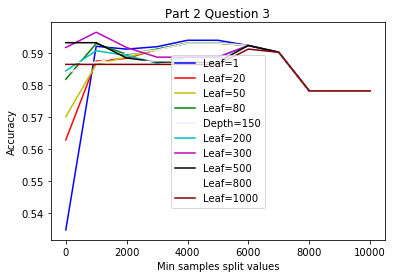

In [313]:
lab = 'y_buy'

# depths = [4, 5, 10, 20]
# leaves = np.arange(1, 101)
leaf = [1,20,50,80,150,200,300,500,800,1000]
split = [2,1000,2000,3000,4000,5000,6000,7000,8000,10000]



#Run all of the options
run=1
if (run == 1):
    #Initialize dictionary of results
    res = dict()
    for d in leaf:
        res[d] = list()

    #Now train and get results for each option
    for d in leaf:
        for l in split:
            res[d].append(accuracy_test(l,d))
            
            
#Now plot            
fig = plt.figure()
ax=fig.add_subplot(111)
plt.plot(split,res[leaf[0]], 'b-', label = 'Leaf={}'.format(leaf[0]))
plt.plot(split,res[leaf[1]], 'r-', label = 'Leaf={}'.format(leaf[1]))
plt.plot(split,res[leaf[2]], 'y-', label = 'Leaf={}'.format(leaf[2]))
plt.plot(split,res[leaf[3]], 'g-', label = 'Leaf={}'.format(leaf[3]))
plt.plot(split,res[leaf[4]], color = '#eeefff', label = 'Depth={}'.format(leaf[4]))
plt.plot(split,res[leaf[5]], 'c-', label = 'Leaf={}'.format(leaf[5]))
plt.plot(split,res[leaf[6]], 'm-', label = 'Leaf={}'.format(leaf[6]))
plt.plot(split,res[leaf[7]], 'k-', label = 'Leaf={}'.format(leaf[7]))
plt.plot(split,res[leaf[8]], 'w-', label = 'Leaf={}'.format(leaf[8]))
plt.plot(split,res[leaf[9]], color = '#800000', label = 'Leaf={}'.format(leaf[9]))


plt.legend(loc = 10)
ax.set_xlabel('Min samples split values')
ax.set_ylabel('Accuracy')
plt.title('Part 2 Question 3')

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

In [314]:
# Code here


parameters_final = []
prediction_final = []
for i in range(0,10):
    for j in range(0,10):
        parameters = (min_samples_split_values[i],min_samples_leaf_values[j])
        value = accuracy_test(min_samples_split_values[i],min_samples_leaf_values[j])
        parameters_final.append(parameters)
        prediction_final.append(value)

In [315]:
# Creat and sorted dataframe to find the prediciton and parameteres in descending order.
parameter_prediciton_accuracy_final = []
for i in range(0,100):
    value = (parameters_final[i], prediction_final[i])
    parameter_prediciton_accuracy_final.append(value)
parameter_prediciton_accuracy_final

parameter_prediciton_accuracy_final_df = pd.DataFrame(parameter_prediciton_accuracy_final, columns=["(min_samples_split, min_samples_leaf)", "prediction_accuracy"])  

parameter_prediciton_accuracy_final_df_sorted = parameter_prediciton_accuracy_final_df.sort('prediction_accuracy', ascending=False)

parameter_prediciton_accuracy_final_df_sorted 

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,"(min_samples_split, min_samples_leaf)",prediction_accuracy
16,"(1000, 300)",0.596463
50,"(5000, 1)",0.593954
40,"(4000, 1)",0.593954
7,"(2, 500)",0.593201
17,"(1000, 500)",0.593201
54,"(5000, 150)",0.593076
53,"(5000, 80)",0.593076
52,"(5000, 50)",0.593076
51,"(5000, 20)",0.593076
43,"(4000, 80)",0.593076


#### Answer:
From the table above we can see that when "min_samples_split = 1000" and "min_samples_leaf = 300", we get the best accuracy.

The accuracy is 0.596463.



5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

#### Answer:

The top three features that influence churn are eqpdays, revenue and outcalls.

Here: the definition of the three features are:

eqpdays: Number of days the customer has had his/her current equipment

revenue: Mean monthly revenue in dollars

outcalls: Mean number of outbound voice calls

Revenue and churndep is negatively correlated, eqpdays and churndep is positively correlated, and outcalls and churndep is negatively correlated.

So in order to keep more customers, we had better to provide products that could attract customers with high revenue and who have more outcalls. The customers had better has less eqdays. Then the churned would happen less. 

We also analyzed that revenue and eqpdays are negatively correlated,revenue and outcalls are positively correlated, and eqpdays and outcalls are negatively correlated. So it is very easy to recognize which customers are less likely to churn. We could focus on the revenue of a customers. If a customer has high revenue, he or she is less likely to churn. 

Churn prediction is good for the business. So the company could predict in advance which customer would leave the company and try to keep the customer before he or she leavse. 

When predicting churn we use the decision tree classifier with 'entropy'as the criterion, and set "min_samples_split = 1000" and "min_samples_leaf = 300". Then we could have the highest churn prediction accuracy. With the help of prediction, the company would keep more costomers.  




